In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

1.Load

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape images to have a channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


2.Define the Model

In [6]:
model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3.Compile

In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

4.Train the Model

In [8]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8931 - loss: 0.3639 - val_accuracy: 0.6625 - val_loss: 1.0429
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9782 - loss: 0.0713 - val_accuracy: 0.9845 - val_loss: 0.0594
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9846 - loss: 0.0507 - val_accuracy: 0.9857 - val_loss: 0.0442
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9895 - val_loss: 0.0358
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9909 - loss: 0.0290 - val_accuracy: 0.9887 - val_loss: 0.0390
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9897 - val_loss: 0.0357
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9897 - val_loss: 0.0396
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 

5.Evaluate

In [9]:
# 5. Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


313/313 - 2s - 8ms/step - accuracy: 0.9870 - loss: 0.0427
Test loss: 0.04268568754196167
Test accuracy: 0.9869999885559082


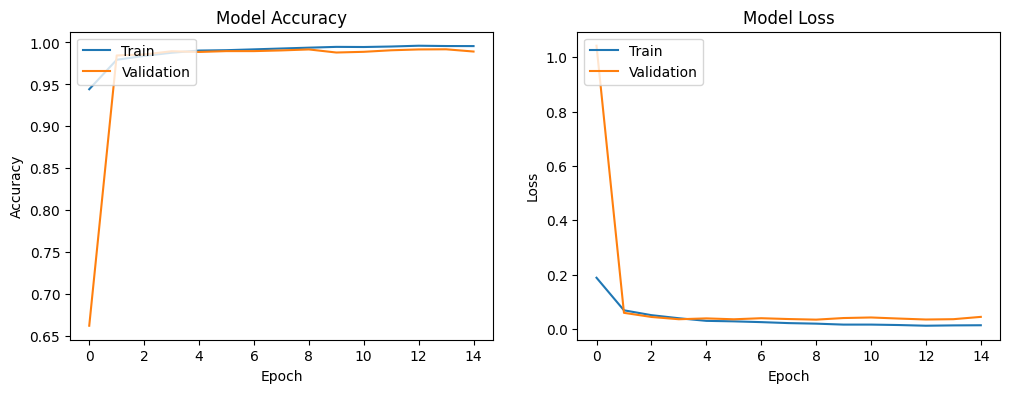

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # Create a subplot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2) # Create a subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()